In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
bike_data = pd.read_csv('train.csv')
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# columns casual + registered = count ( value to be predicted)
# so we can drop the columns casual , registered
df = bike_data.copy()
df = df.drop(['datetime','casual','registered'],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,0,0,1,9.02,13.635,80,0.0,40
2,1,0,0,1,9.02,13.635,80,0.0,32
3,1,0,0,1,9.84,14.395,75,0.0,13
4,1,0,0,1,9.84,14.395,75,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


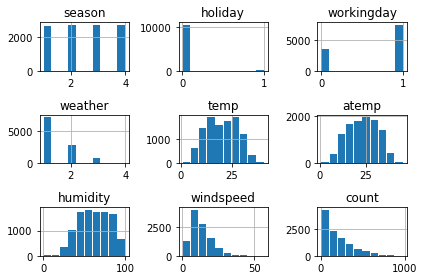

In [6]:
df.hist(rwidth=0.9)
plt.tight_layout()

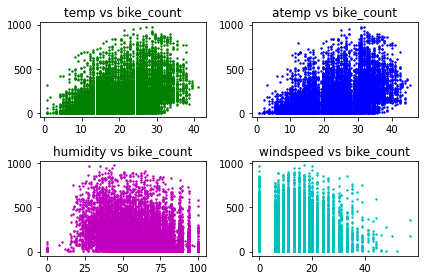

In [7]:
color=['g','b','m','c']
j=1
for i in ['temp','atemp','humidity','windspeed']:
    plt.subplot(2,2,j)
    plt.title('{} vs bike_count'.format(i))
    plt.scatter(df[i],df['count'],s=2,c=color[j-1])
    j+=1
plt.tight_layout()

In [8]:
df[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [9]:
df['newTemp'] = (df['temp'] + df['atemp']) /2
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,newTemp
0,1,0,0,1,9.84,14.395,81,0.0,16,12.1175
1,1,0,0,1,9.02,13.635,80,0.0,40,11.3275
2,1,0,0,1,9.02,13.635,80,0.0,32,11.3275
3,1,0,0,1,9.84,14.395,75,0.0,13,12.1175
4,1,0,0,1,9.84,14.395,75,0.0,1,12.1175


<AxesSubplot:>

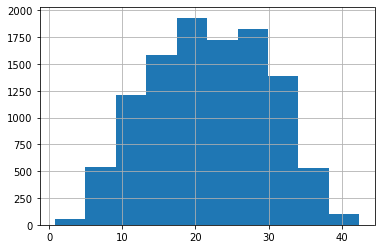

In [10]:
df['newTemp'].hist()

In [11]:
df1 = df.copy()
df1 = df1.drop(['workingday','temp','atemp','windspeed'],axis=1)
df1.head()

,season,holiday,weather,humidity,count,newTemp
0,1,0,1,81,16,12.1175
1,1,0,1,80,40,11.3275
2,1,0,1,80,32,11.3275
3,1,0,1,75,13,12.1175
4,1,0,1,75,1,12.1175


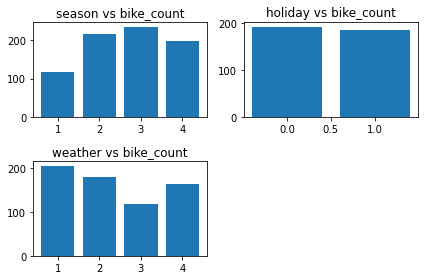

In [12]:
j=1
for i in ['season','holiday','weather']:
    plt.subplot(2,2,j)
    plt.title('{} vs bike_count'.format(i))
    x_list = df1[i].unique()
    y_list = df1.groupby(i).mean()['count']
    plt.bar(x_list,y_list)
    j+=1
plt.tight_layout()

In [13]:
df1['count'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    452.00
0.95    563.75
0.99    774.15
Name: count, dtype: float64

<AxesSubplot:>

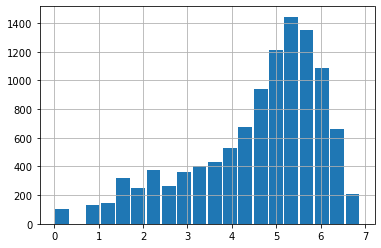

In [14]:
#normalizing target variable
df1['count'] = np.log(df1['count'])
df1['count'].hist(rwidth=0.9,bins=20)

In [15]:
# solving Autocorelation ??
t_1 = df1['count'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df1['count'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df1['count'].shift(+3).to_frame()
t_3.columns = ['t-3']

df1 = pd.concat([df1, t_1, t_2, t_3], axis=1)

df1 = df1.dropna()


In [16]:
df1.dtypes
## the categorical features are type int64 , for get dummies
## to work we need to convert them to type categorical

season        int64
holiday       int64
weather       int64
humidity      int64
count       float64
newTemp     float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [17]:
cat_feature = ['season','holiday','weather']
for i in cat_feature:
    df1[i] = df1[i].astype('category')
df1.dtypes

season      category
holiday     category
weather     category
humidity       int64
count        float64
newTemp      float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [18]:
df1_dummy = pd.get_dummies(df1[cat_feature],drop_first=True)
df1 = pd.concat([df1.iloc[:,3:],df1_dummy],axis=1)
df1.head()

,humidity,count,newTemp,t-1,t-2,t-3,season_2,season_3,season_4,holiday_1,weather_2,weather_3,weather_4
3,75,2.564949,12.1175,3.465736,3.688879,2.772589,0,0,0,0,0,0,0
4,75,0.000000,12.1175,2.564949,3.465736,3.688879,0,0,0,0,0,0,0
5,75,0.000000,11.3600,0.000000,2.564949,3.465736,0,0,0,0,1,0,0
6,80,0.693147,11.3275,0.000000,0.000000,2.564949,0,0,0,0,0,0,0
7,86,1.098612,10.5400,0.693147,0.000000,0.000000,0,0,0,0,0,0,0


In [19]:
## from sklearn.model_selection import train_test_split as tts
## tts does not work on time series data , or 
## else we loose the auto corelation

Y=df1[['count']]
X=df1.drop(['count'],axis=1)

tr_size = int(0.7*len(X))
X_train = X.iloc[0:tr_size,:]
X_test = X.iloc[tr_size:,:]

Y_train = Y.iloc[0:tr_size,:]
Y_test = Y.iloc[tr_size:,:]

print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('Y_train : ',Y_train.shape)
print('Y_test : ',Y_test.shape)

X_train :  (7618, 12)
X_test :  (3265, 12)
Y_train :  (7618, 1)
Y_test :  (3265, 1)


In [20]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, Y_train)

r2score_train = clf.score(X_train, Y_train)
r2score_test = clf.score(X_test,Y_test)

Y_predict = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

print('r2score_train : ',r2score_train)
print('r2score_test : ',r2score_test)
print('rmse : ',rmse)

r2score_train :  0.8507913042738182
r2score_test :  0.8761999800400395
rmse :  0.4894290735446652


In [21]:
y_test=list(Y_test['count'][:])
#y_predict=list(Y_predict['count'][:])
Y_predict=[i for i in Y_predict]

In [23]:
## calculate rmsle

Y_test_e = []
Y_predict_e = []

for i in range(0, len(y_test)):
    Y_test_e.append(math.exp(y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.46574878353084137


In [ ]:
## very bad model

In [24]:
## testing on test.csv
testdf = pd.read_csv('test.csv')
testdf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [58]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [78]:
dff1 = testdf.copy()
dff1['newTemp'] = (dff1['temp']+dff1['atemp'])/2
dff1 = dff1.drop(['datetime','workingday','windspeed','temp','atemp'],axis=1)
dff1.head()

,season,holiday,weather,humidity,newTemp
0,1,0,1,56,11.0125
1,1,0,1,56,12.1475
2,1,0,1,56,12.1475
3,1,0,1,56,11.7700
4,1,0,1,56,11.7700


In [79]:
dff1.isnull().sum()

season      0
holiday     0
weather     0
humidity    0
newTemp     0
dtype: int64

In [80]:
cat_feature = ['season','holiday','weather']
for i in cat_feature:
    dff1[i] = dff1[i].astype('category')
dff1.dtypes

season      category
holiday     category
weather     category
humidity       int64
newTemp      float64
dtype: object

In [81]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   season    6493 non-null   category
 1   holiday   6493 non-null   category
 2   weather   6493 non-null   category
 3   humidity  6493 non-null   int64   
 4   newTemp   6493 non-null   float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 121.1 KB


In [82]:
dff1_dummy = pd.get_dummies(dff1[cat_feature],drop_first=True)
dff1 = pd.concat([dff1[['humidity','newTemp']],df1_dummy],axis=1)
dff1.head()


,humidity,newTemp,season_2,season_3,season_4,holiday_1,weather_2,weather_3,weather_4
0,56.0,11.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56.0,12.1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.0,12.1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56.0,11.7700,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,11.7700,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   humidity   6493 non-null   float64
 1   newTemp    6493 non-null   float64
 2   season_2   10883 non-null  float64
 3   season_3   10883 non-null  float64
 4   season_4   10883 non-null  float64
 5   holiday_1  10883 non-null  float64
 6   weather_2  10883 non-null  float64
 7   weather_3  10883 non-null  float64
 8   weather_4  10883 non-null  float64
dtypes: float64(9)
memory usage: 850.5 KB


In [75]:
dff1.isnull().sum()

humidity     4393
newTemp      4393
season_2        3
season_3        3
season_4        3
holiday_1       3
weather_2       3
weather_3       3
weather_4       3
dtype: int64

In [40]:
dff1['humidity'].fillna(dff1['humidity'].mean(),inplace=True)
dff1['newTemp'].fillna(dff1['newTemp'].mean(),inplace=True)
dff1['']

humidity     0
newTemp      0
season_2     3
season_3     3
season_4     3
holiday_1    3
weather_2    3
weather_3    3
weather_4    3
dtype: int64